In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
from PIL import Image
import numpy as np
from tqdm import tqdm

In [10]:
maxlen=26

In [11]:
model = Sequential()
model.add(GRU(128, input_shape=(maxlen, 1)))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam')


In [12]:
model.load_weights('model.h5')

In [13]:
x=np.array(Image.open('hint.png').convert('L'))/255

In [14]:
x.shape

(13, 2)

In [15]:
pixels = x.transpose().flatten()
generated = pixels

for i in tqdm(range(0, 100*x.shape[0])):
    x_pred = pixels.reshape(1, maxlen)
    preds = model.predict(x_pred, verbose=0)[0]
    pixels=np.append(pixels[1:], preds)
    generated=np.append(generated, preds)

100%|██████████| 1300/1300 [01:12<00:00, 17.99it/s]


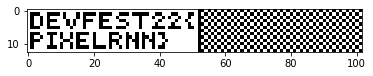

In [16]:
import matplotlib.pyplot as plt
plt.imshow(generated.reshape(102, x.shape[0]).transpose(), cmap='gray')
